Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# EDA on Bank Loan Dataset

Importing the dataset using pandas

In [2]:
df = pd.read_excel(io='Bank_Personal_Loan_Modelling.xlsx' ,sheetname='Data')

In [3]:
for i in df.columns:
    print('Column name is' , i , 'and its location is' ,df.columns.get_loc(i))

Column name is ID and its location is 0
Column name is Age and its location is 1
Column name is Experience and its location is 2
Column name is Income and its location is 3
Column name is ZIP Code and its location is 4
Column name is Family and its location is 5
Column name is CCAvg and its location is 6
Column name is Education and its location is 7
Column name is Mortgage and its location is 8
Column name is Personal Loan and its location is 9
Column name is Securities Account and its location is 10
Column name is CD Account and its location is 11
Column name is Online and its location is 12
Column name is CreditCard and its location is 13


ID - Customer ID<br>
Age - Age of that customer in years<br>
Experience - Number of years of work experience<br>
Income - Annual Income in in thousand dollars<br>
ZIP Code - Address zip code of the customer<br>
Family - Number of members in that family<br>
CCAvg - Average monthly spending on credit cards in thousand dollars<br>
Education - Level of education 0 - Undergrad , 1 - Graduate , 3 - Advanced/Professional<br>
Mortgage - House mortgage value in thousand dollars<br>
Personal Loan - 0 or 1 value if customer accepted personal loan in the previous campaign<br>
Securities Account - 0 or 1 value if customer has securities in the bank<br>
CD Account - 0 or 1 value if customer has certificate of deposit account(type of account) in the bank<br>
Online - 0 or 1 value if customer uses online banking<br>
CreditCard - 0 or 1 value if customer uses credit card<br>

Get some basic info on the columns, number of rows, data types of the columns, if null or not

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Just to be sure there are no NaN values in the dataset, use below technique.

In [5]:
df.isnull().values.any()

False

No duplicated values either

In [6]:
df.duplicated().any()

False

df.head() is always good to use when viewing a dataset for the first, just to look at some of the data.

In [7]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


To get basic statistical information from the dataset we can use below pandas function.

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As we see above the minimum experience is -3, which is unexpected. So below we look for negative values across the entire dataset. This will give us a count of negative values present if any of the columns.

In [9]:
for col in df.columns:
    print(col , sum([n < 0 for n  in df[col].values.flatten()]))

ID 0
Age 0
Experience 52
Income 0
ZIP Code 0
Family 0
CCAvg 0
Education 0
Mortgage 0
Personal Loan 0
Securities Account 0
CD Account 0
Online 0
CreditCard 0


Negative 'Experience' values are a data anamoly and can affect your analysis or predicitons in the future. One can take a decision to keep it and replace it with median values or get rid of such values for a cleaner data. Before that, we can list down the records with such negative values.
Kindly note that as we see above the mean is 20.104, so converting the negative values (52 such values) to the mean or the median(which is also 20) will skew the data when performing regression. So it is better to remove such values.

In [10]:
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.300000,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.700000,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.300000,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.750000,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.200000,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.400000,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.300000,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.300000,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.700000,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.200000,1,0,0,1,0,0,1


The age of the negative experience values is proof that replacing it with mean(20) will be incorrect and will skew the data.

In [11]:
df_cleaned = df[df['Experience'] > 0]

Now we can get a better idea of the minimum and maximum experienced customers in our dataset, but, make sure to use the cleaned dataset

In [12]:
df_cleaned.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000
mean,2496.172061,45.826506,20.605899,73.870750,93150.227366,2.386112,1.935385,1.874846,56.844326,0.096887,0.104056,0.061450,0.598730,0.294961
std,1439.377900,11.155088,11.136704,46.112752,2130.612121,1.148222,1.745068,0.839329,102.009136,0.295833,0.305364,0.240179,0.490206,0.456072
min,1.000000,25.000000,1.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.250000,36.000000,11.000000,39.000000,91910.250000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2490.500000,46.000000,21.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3735.750000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.750000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you can see the minimum age changed too. So now we know that there are no just passed undergrads(considering 22 as the general passing age of all undergrads) in this banks customer dataset.

We can visualise the categorical columns to see the count of customers who have Personal Loans, Security deposits, CDAccounts, do online transactions or hold credit cars

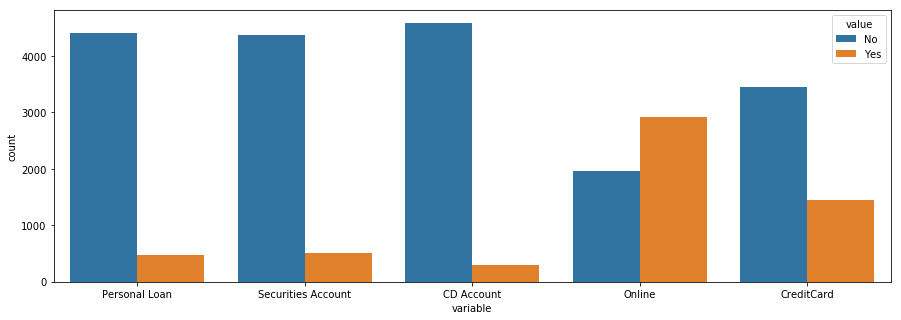

In [13]:
melted_data = pd.melt(df_cleaned.iloc[:,9:])
melted_data.loc[melted_data['value'] == 0 , ['value']] = 'No'
melted_data.loc[melted_data['value'] == 1 , ['value']] = 'Yes'
plt.figure(figsize=(15,5))
sn.countplot(x="variable", hue="value", data=melted_data)
plt.show()
plt.close()

From the above graph we can observe that a major portion of the customers have no securities or CD Accounts. Around 3000 use Online banking but not many use credit cards. Credit cards usage is mostly among youngsters generally. The average age of this dataset is 45, so it makes sense that credit card users are less.

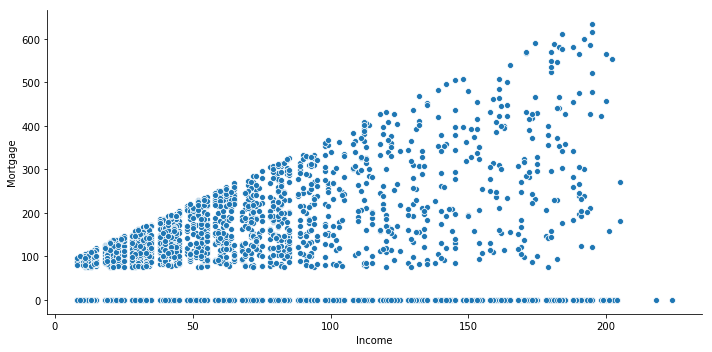

In [14]:
plt.figure(figsize=(10,5))
sn.relplot(x="Income", y="Mortgage" ,aspect = 2 ,data=df_cleaned)
plt.show()
plt.clf()

Income and Mortgage is a linear relation. The datapoints become sparse towards the end which justify that higher income customers have either cleared out mortgages or don't have any.

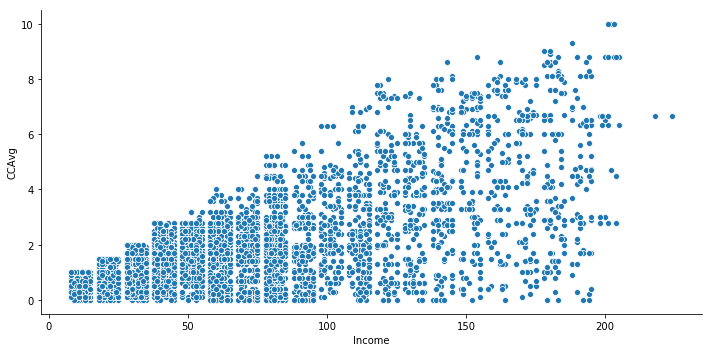

In [15]:
plt.figure(figsize=(10,5))
sn.relplot(x="Income", y="CCAvg" ,aspect = 2 ,data=df_cleaned)
plt.show()
plt.clf()

Income and credit card average use is also related in a linear fashion and is more dense in the income bracket of 50k-100k bracket.

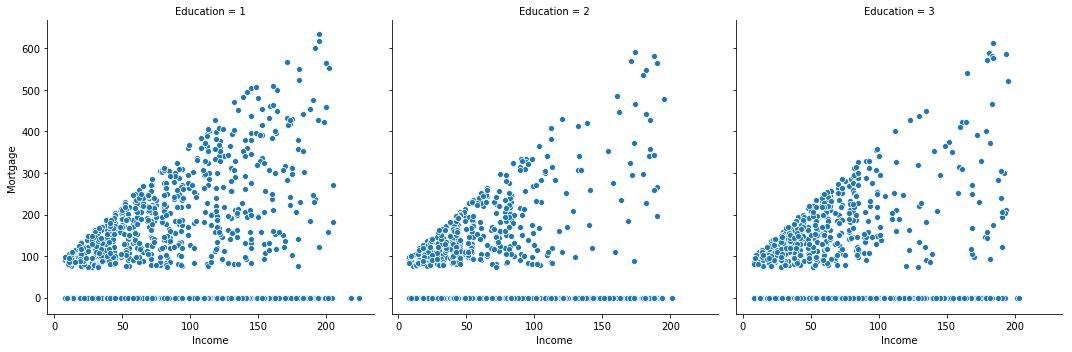

In [16]:
plt.figure(figsize=(10,5))
sn.relplot(x="Income", y="Mortgage", #hue="Personal Loan",
            col="Education", data=df_cleaned)
plt.show()
plt.clf()

Higher income level and higher education level customers have very few mortgages on them. Plus there are some smart people who dont have any mortgages across all education levels.
The mortgages are mainly concentrated between 0k-80k annual income individuals irrespective of the education background.

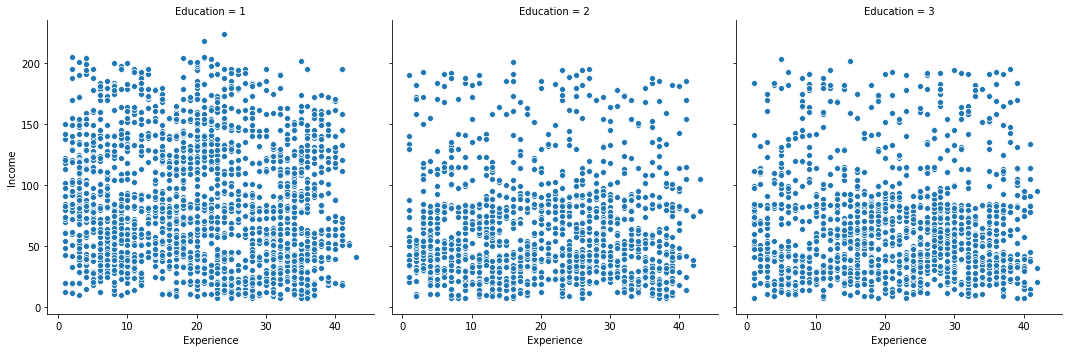

In [17]:
plt.figure(figsize=(5,5))
sn.relplot(x="Experience", y="Income",col = "Education",
             data=df_cleaned)
plt.show()
plt.clf()

Income of customers with higher experiences is an even spread and not related linearly.<br>
It should be noted that even with Bachelors level education, higher experience indivudals have higher income as compared to their more educated counterparts.<br>
The scatter plot is sparse above 100k USD for higher educated customers with the same experience.

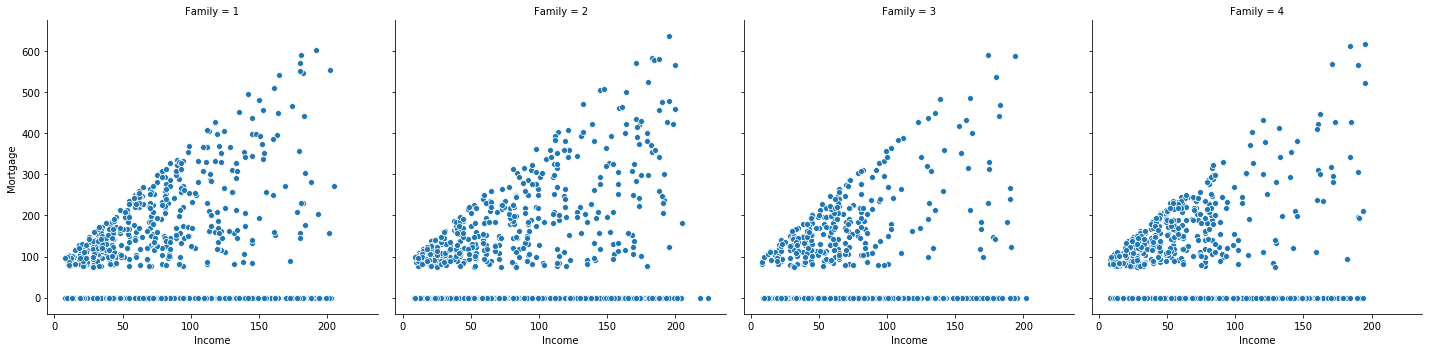

In [18]:
plt.figure(figsize=(5,5))
sn.relplot(x="Income", y="Mortgage",col = "Family",# hue="Education",
             data=df_cleaned)
plt.show()
plt.clf()

Income and Mortgage was linearly related.<br>
When we see this relation with respect to the number of family members we see that above 100k USD annual income, families of 3 and 4 have lesser mortgages as compared to families of 1 or 2.

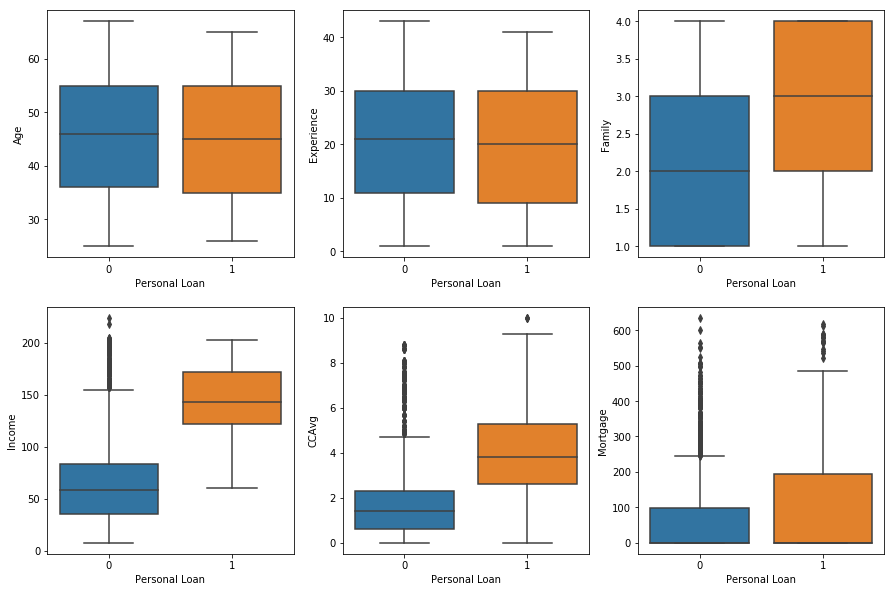

In [19]:
numerical = ['Age' , 'Experience' ,'Family' ,'Income' , 'CCAvg' , 'Mortgage']
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(numerical, ax.flatten()):
    sn.boxplot(x='Personal Loan', y=var, data=df_cleaned, ax=subplot)
plt.show()
plt.clf()

Since this is a loan modelling problem, our EDA should conclude with analysis of the numerical values with a categorical Personal Loan feature, and a box plot is the best way to do it<br>
1. Age of the customer is not a defining factor if the person will accept a personal loan or not.<br>
2. Professional years of experience also not a governing factor.
3. As we saw in the previous graph, a family of 3 or 4 has lesser mortgages even with higher incomes. The reason, based on this box plot can be the fact that taking a personal loan with higher interest rate might seem justified to them. Will show it in a graph below.
4. As expected, higher the income more is the chance that a person will accept a personal loan offer from the bank.
5. If one's credit card average spending per month is higher, they will probably accept a personal loan offer.
6. Higher mortgage means a custome might accept a personal loan offer.

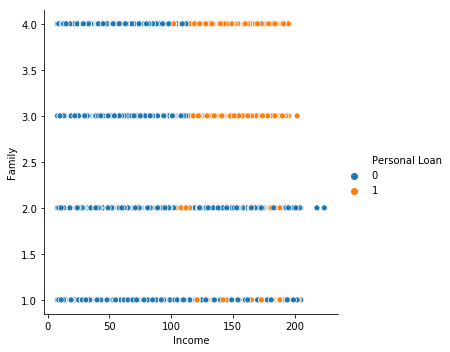

In [20]:
plt.figure(figsize=(5,5))
sn.relplot(x="Income", y="Family",#col = "Family", 
           hue="Personal Loan",
             data=df_cleaned)
plt.show()
plt.clf()

As explained earlier larger families with higher incomes tend to accept more personal loans than smaller families.